# <span style="color:red">**PM-PR-0017 No-Churn Telecom**</span>



#### *Team ID: PTID-CDS-JAN-25-2373*


## **Business Case:**
 No-Churn Telecom is a leading European telecom operator with 10+ years in business.

➡️The telecom industry is now highly competitive, making customer retention difficult.

➡️Despite reducing tariffs and offering promotions, churn rate remains above 10%.

➡️No-Churn aims to leverage Machine Learning to predict churn and retain customers.

## **Problem Statement**

### Help No-Churn with their use cases with ML
Help No-Churn Telecom achieve the following goals using Machine Learning:

📌 1. Identify Key Factors:
Understand the variables influencing customers to migrate to competitors.

📌 2. Create Churn Risk Scores:
Develop risk scores to guide targeted retention campaigns.

📌 3. Predict Churn with "CHURN-FLAG":
Introduce a new variable "CHURN-FLAG" (YES = 1, NO = 0) for targeting churn-prone customers with special offers.

📌 4. Prioritize Customer Care:
Flag potential churn customers for enhanced attention — faster support, quick ticket resolution, and proactive service

## **Feature Defenition**

*State*-------Customer's state of residence (categorical)

*Account Length*-----Number of days the customer has had the telecom account

*Area Code*-----Telephone area code assigned to the customer

*Phone*-----Customer's phone number (identifier; usually dropped)

*International Plan*-----Whether the customer has an international calling plan (Yes/No)

*VMail Plan*-----Whether the customer has a voicemail plan (Yes/No)

*VMail Message*-----Number of voicemail messages the customer has received

*Day Mins*-----Total minutes of calls made during the day period

*Day Calls*-----Number of calls made during the day period

*Day Charge*-----Charges for day calls (likely derived from Day Mins)

*Eve Mins*-----Total minutes of calls made during the evening period

*Eve Calls*-----Number of calls made during the evening period

*Eve Charge*-----Charges for evening calls (likely derived from Eve Mins)

*Night Mins*-----Total minutes of calls made during the night period

*Night Calls*-----Number of calls made during the night period

*Night Charge*-----Charges for night calls (likely derived from Night Mins)

*International Mins*-----Minutes of international calls made by the customer

*International Calls*-----Number of international calls made

*International Charge*-----Charges incurred from international calls

*CustServ Calls*-----Number of calls made by the customer to customer service

*Churn*-----Whether the customer left the company (Yes/No — Target Variable)

## **Importing Basic Libraries**


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import cv2 as cv
import os
import random


import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder


## **Loading the Dataset**

In [ ]:
!pip install pymysql


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.3 MB/s eta 0:00:00


In [ ]:
# Importing necessary libraries
import pymysql

# Step 1: Define database connection parameters
host = '18.136.157.135'
user = 'dm_team3'
password = 'DM!$!Team!27@9!20&'
database = 'project_telecom'

# Step 2: Establish a connection to the MySQL database
conn = pymysql.connect(
    host=host,
    user=user,
    password=password,
    database=database
)

# Step 3: Write the SQL query to fetch all data from the table
query = "SELECT * FROM telecom_churn_data"

# Step 4: Execute the query and load the results into a DataFrame
raw_data = pd.read_sql(query, conn)

# Step 5: Close the database connection
conn.close()
raw_data.head()


,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [ ]:
column_names = [
    'State', 'Account Length', 'Area Code', 'Phone', 'International Plan',
    'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
    'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge',
    'International Mins', 'International Calls', 'International Charge',
    'CustServ Calls', 'Churn'
]

raw_data.columns = column_names
raw_data.head()


,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [ ]:
data=raw_data.copy()

## **Basic Checks**

In [ ]:
pd.set_option('display.max_columns',None)
data.head()


,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [ ]:
data.tail()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.
4616,IN,140,415,409-6884,no,no,0,204.7,100,34.8,126.8,107,10.78,202.8,115,9.13,12.1,4,3.27,2,False.


In [ ]:
data.shape

(4617, 21)

#### Insights
This dataset has 4617 rows and 21 columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State                 4617 non-null   object
 1   Account Length        4617 non-null   object
 2   Area Code             4617 non-null   object
 3   Phone                 4617 non-null   object
 4   International Plan    4617 non-null   object
 5   VMail Plan            4617 non-null   object
 6   VMail Message         4617 non-null   object
 7   Day Mins              4617 non-null   object
 8   Day Calls             4617 non-null   object
 9   Day Charge            4617 non-null   object
 10  Eve Mins              4617 non-null   object
 11  Eve Calls             4617 non-null   object
 12  Eve Charge            4617 non-null   object
 13  Night Mins            4617 non-null   object
 14  Night Calls           4617 non-null   object
 15  Night Charge          4617 non-null   

In [ ]:
# Columns that should be numeric (excluding categorical features)
numeric_cols = [
    'Account Length', 'VMail Message',
    'Day Mins', 'Day Calls', 'Day Charge',
    'Eve Mins', 'Eve Calls', 'Eve Charge',
    'Night Mins', 'Night Calls', 'Night Charge',
    'International Mins', 'International Calls', 'International Charge',
    'CustServ Calls'
]

# Convert those columns to numeric types (int/float)
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')


In [ ]:

data['Area Code'] = data['Area Code'].astype(int)

In [ ]:
data.dtypes[data.dtypes!='object']

,0
Account Length,int64
Area Code,int64
VMail Message,int64
Day Mins,float64
Day Calls,int64
Day Charge,float64
Eve Mins,float64
Eve Calls,int64
Eve Charge,float64
Night Mins,float64


In [ ]:
data.dtypes[data.dtypes=='object']

,0
State,object
Phone,object
International Plan,object
VMail Plan,object
Churn,object


In [ ]:
# Separating numerical and categorical columns
numerical_columns = data.select_dtypes(include=['number']).columns

categorical_columns = data.select_dtypes(include=['object', 'category']).columns

numerical_data = data[numerical_columns]
categorical_data = data[categorical_columns]



In [ ]:
#  unique values in categorical columns
unique_categorical_values = data[categorical_columns].nunique()

print("Unique values in each categorical column:")
print(unique_categorical_values)

for column in categorical_columns:
    print(f"\nUnique values in '{column}':")
    print(data[column].unique())


Unique values in each categorical column:
State                   51
Phone                 4617
International Plan       2
VMail Plan               2
Churn                    2
dtype: int64

Unique values in 'State':
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

Unique values in 'Phone':
[' 382-4657' ' 371-7191' ' 358-1921' ... ' 338-4794' ' 355-8388'
 ' 409-6884']

Unique values in 'International Plan':
[' no' ' yes']

Unique values in 'VMail Plan':
[' yes' ' no']

Unique values in 'Churn':
[' False.' ' True.']


In [ ]:
null_values=data.isna().sum()
null_values[null_values>0]

,0


#### **Insights**
There are no null values in the dataset

In [ ]:
duplicates=data[data.duplicated()]
duplicates

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn


#### **Insights**
There are no Duplicates values in the dataset

## **Statistical Analysis**

In [ ]:
data.describe(include='object').T

,count,unique,top,freq
State,4617,51,WV,149
Phone,4617,4617,409-6884,1
International Plan,4617,2,no,4171
VMail Plan,4617,2,no,3381
Churn,4617,2,False.,3961


In [ ]:
data.drop(columns=['Phone'],inplace=True)


In [ ]:
region_mapping = {
    # Northeast
    'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast', 'NH': 'Northeast',
    'RI': 'Northeast', 'VT': 'Northeast', 'NJ': 'Northeast', 'NY': 'Northeast',
    'PA': 'Northeast',

    # Midwest
    'IL': 'Midwest', 'IN': 'Midwest', 'IA': 'Midwest', 'KS': 'Midwest',
    'MI': 'Midwest', 'MN': 'Midwest', 'MO': 'Midwest', 'NE': 'Midwest',
    'ND': 'Midwest', 'OH': 'Midwest', 'SD': 'Midwest', 'WI': 'Midwest',

    # South
    'AL': 'South', 'AR': 'South', 'DE': 'South', 'FL': 'South', 'GA': 'South',
    'KY': 'South', 'LA': 'South', 'MD': 'South', 'MS': 'South', 'NC': 'South',
    'OK': 'South', 'SC': 'South', 'TN': 'South', 'TX': 'South', 'VA': 'South',
    'WV': 'South', 'DC': 'South',

    # West
    'AK': 'West', 'AZ': 'West', 'CA': 'West', 'CO': 'West', 'HI': 'West',
    'ID': 'West', 'MT': 'West', 'NV': 'West', 'NM': 'West', 'OR': 'West',
    'UT': 'West', 'WA': 'West', 'WY': 'West'
}

data['Region'] = data['State'].map(region_mapping)
data.drop(columns=['State'],inplace=True)

In [ ]:
data.describe(include='number').round(2).T

,count,mean,std,min,25%,50%,75%,max
Account Length,4617.0,100.65,39.60,1.00,74.00,100.00,127.00,243.00
Area Code,4617.0,437.05,42.29,408.00,408.00,415.00,510.00,510.00
VMail Message,4617.0,7.85,13.59,0.00,0.00,0.00,17.00,51.00
Day Mins,4617.0,180.45,53.98,0.00,143.70,180.00,216.80,351.50
Day Calls,4617.0,100.05,19.88,0.00,87.00,100.00,113.00,165.00
Day Charge,4617.0,30.68,9.18,0.00,24.43,30.60,36.86,59.76
Eve Mins,4617.0,200.43,50.56,0.00,165.90,200.80,234.00,363.70
Eve Calls,4617.0,100.18,19.82,0.00,87.00,101.00,114.00,170.00
Eve Charge,4617.0,17.04,4.30,0.00,14.10,17.07,19.89,30.91
Night Mins,4617.0,200.62,50.54,23.20,167.10,200.80,234.90,395.00


In [ ]:
# Create total minutes and total charges columns
data['Total Mins'] = data['Day Mins'] + data['Eve Mins'] + data['Night Mins'] + data['International Mins']
data['Total Charges'] = data['Day Charge'] + data['Eve Charge'] + data['Night Charge'] + data['International Charge']

# Drop individual minute and charge columns
data.drop(columns=[
    'Day Mins', 'Eve Mins', 'Night Mins', 'International Mins',
    'Day Charge', 'Eve Charge', 'Night Charge', 'International Charge'
], inplace=True)


In [ ]:
data.head()

,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Calls,Eve Calls,Night Calls,International Calls,CustServ Calls,Churn,Region,Total Mins,Total Charges
0,128,415,no,yes,25,110,99,91,3,1,False.,Midwest,717.2,75.56
1,107,415,no,yes,26,123,103,103,3,1,False.,Midwest,625.2,59.24
2,137,415,no,no,0,114,110,104,5,0,False.,Northeast,539.4,62.29
3,84,408,yes,no,0,71,88,89,7,2,False.,Midwest,564.8,66.80
4,75,415,yes,no,0,113,122,121,3,3,False.,South,512.0,52.09


## **Exploratory Data Analysis**

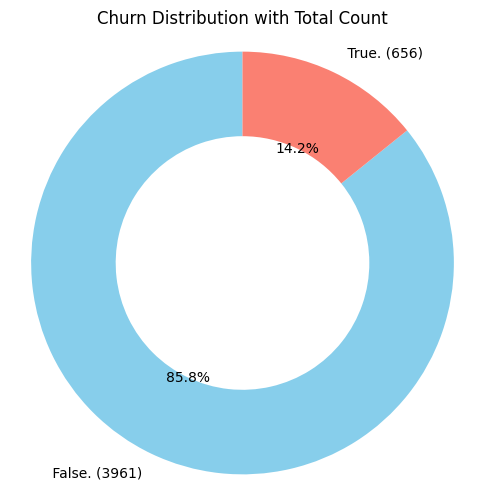

In [ ]:
# Count churn values
churn_counts = data['Churn'].value_counts()

labels = [f'{label} ({count})' for label, count in churn_counts.items()]
colors = ['skyblue', 'salmon']


plt.figure(figsize=(6, 6))

plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'width': 0.4})
plt.title('Churn Distribution with Total Count')
plt.axis('equal')
plt.show()


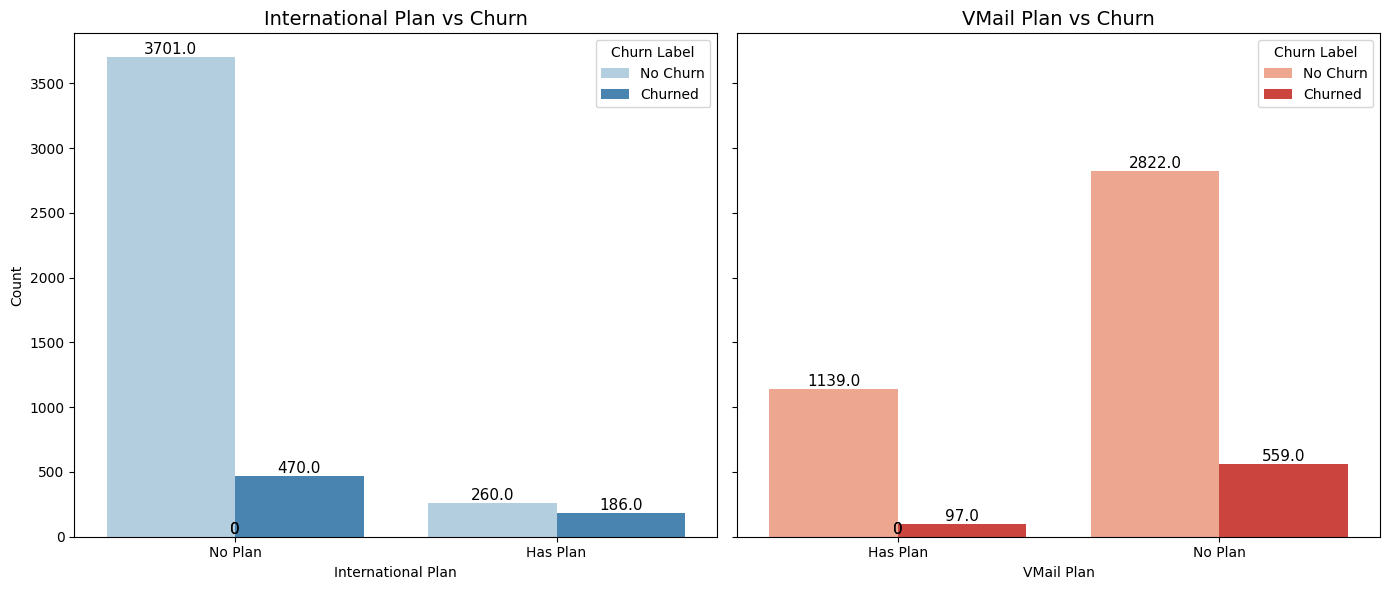

In [ ]:
data['International Plan Label'] = data['International Plan'].map({0: 'No Plan', 1: 'Has Plan'})
data['VMail Plan Label'] = data['VMail Plan'].map({0: 'No Plan', 1: 'Has Plan'})
data['Churn Label'] = data['Churn'].map({0: 'No Churn', 1: 'Churned'})


fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot 1: International Plan vs Churn
sns.countplot(ax=axes[0], x='International Plan Label', hue='Churn Label', data=data, palette='Blues')
axes[0].set_title('International Plan vs Churn', fontsize=14)
axes[0].set_xlabel('International Plan')
axes[0].set_ylabel('Count')

# Annotate bar values
for p in axes[0].patches:
    height = p.get_height()
    axes[0].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=11)

# Plot 2: VMail Plan vs Churn
sns.countplot(ax=axes[1], x='VMail Plan Label', hue='Churn Label', data=data, palette='Reds')
axes[1].set_title('VMail Plan vs Churn', fontsize=14)
axes[1].set_xlabel('VMail Plan')

# Annotate bar values
for p in axes[1].patches:
    height = p.get_height()
    axes[1].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=11)


plt.tight_layout()
plt.show()


#### Insights
Customers with an International Plan have a higher churn rate compared to those without one, indicating dissatisfaction despite international features.

Customers without a Voicemail Plan tend to churn more than those who have it, suggesting that voicemail services help retain customers.

Offering better international and voicemail services could be a key strategy to reduce churn rates effectively.

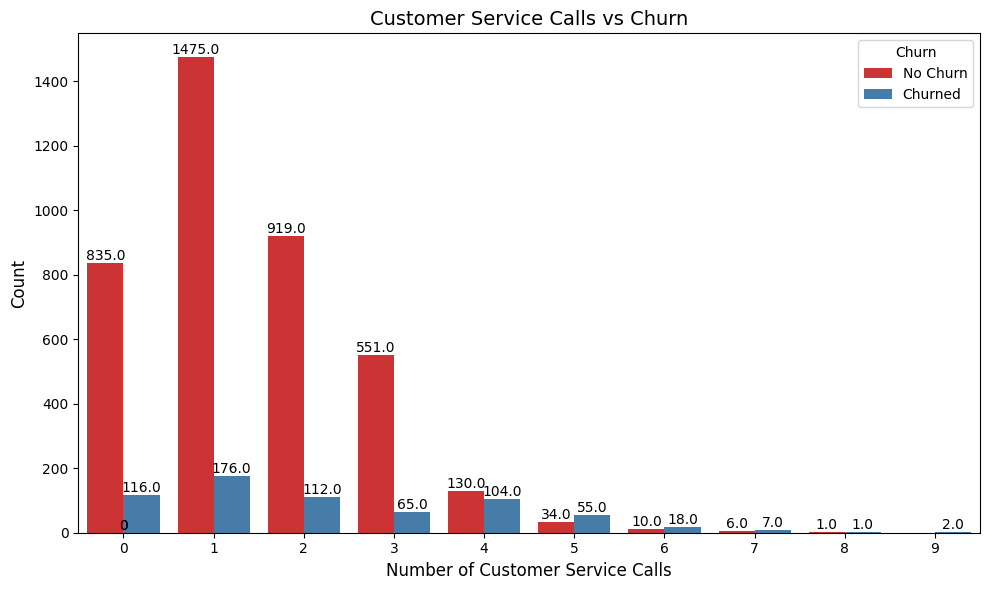

In [ ]:
data['Churn Label'] = data['Churn'].map({0: 'No Churn', 1: 'Churned'})

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='CustServ Calls', data=data, hue='Churn Label', palette='Set1')

plt.title('Customer Service Calls vs Churn', fontsize=14)
plt.xlabel('Number of Customer Service Calls', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


#### Insights
As the number of customer service calls increases, the churn rate also increases significantly, especially after 3 or more calls.

Customers making 4 or more service calls show a higher tendency to churn compared to those with fewer interactions.

Poor customer service experience or repeated issues might be a strong driver of customer churn, highlighting the need to improve support quality.

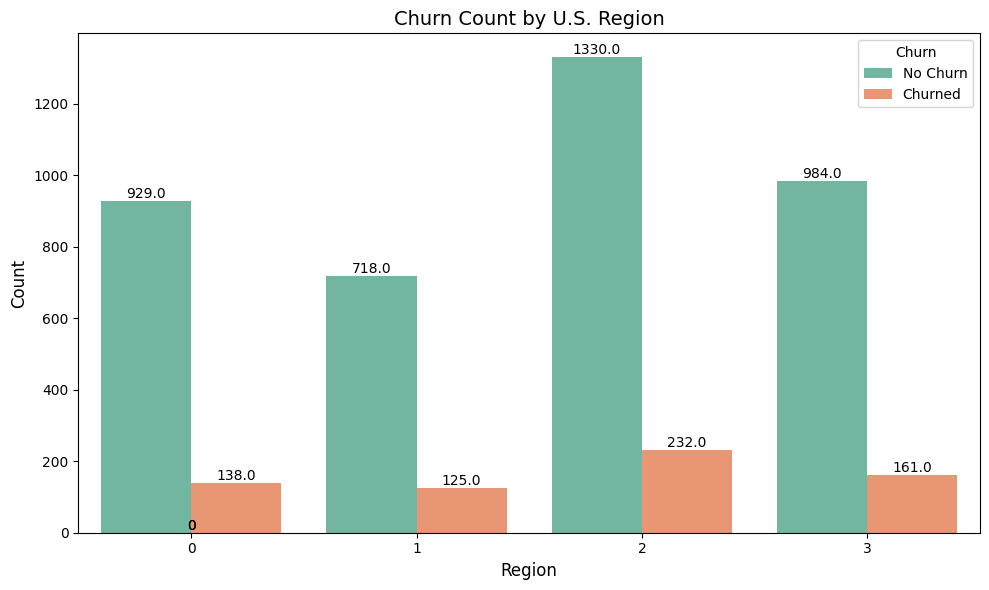

In [ ]:
data['Churn Label'] = data['Churn'].map({0: 'No Churn', 1: 'Churned'})
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Region', data=data, hue='Churn Label', palette='Set2')
plt.title('Churn Count by U.S. Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn')

# Annotate count labels on bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10)
plt.tight_layout()
plt.show()


#### Insights
Region 2(South) has the highest number of churned customers compared to other regions.

While churn is present in all regions, Region 2 shows a notably higher churn volume, suggesting possible regional service issues.


In [ ]:
data.drop(columns=['International Plan Label', 'VMail Plan Label', 'Churn Label'], inplace=True, errors='ignore')


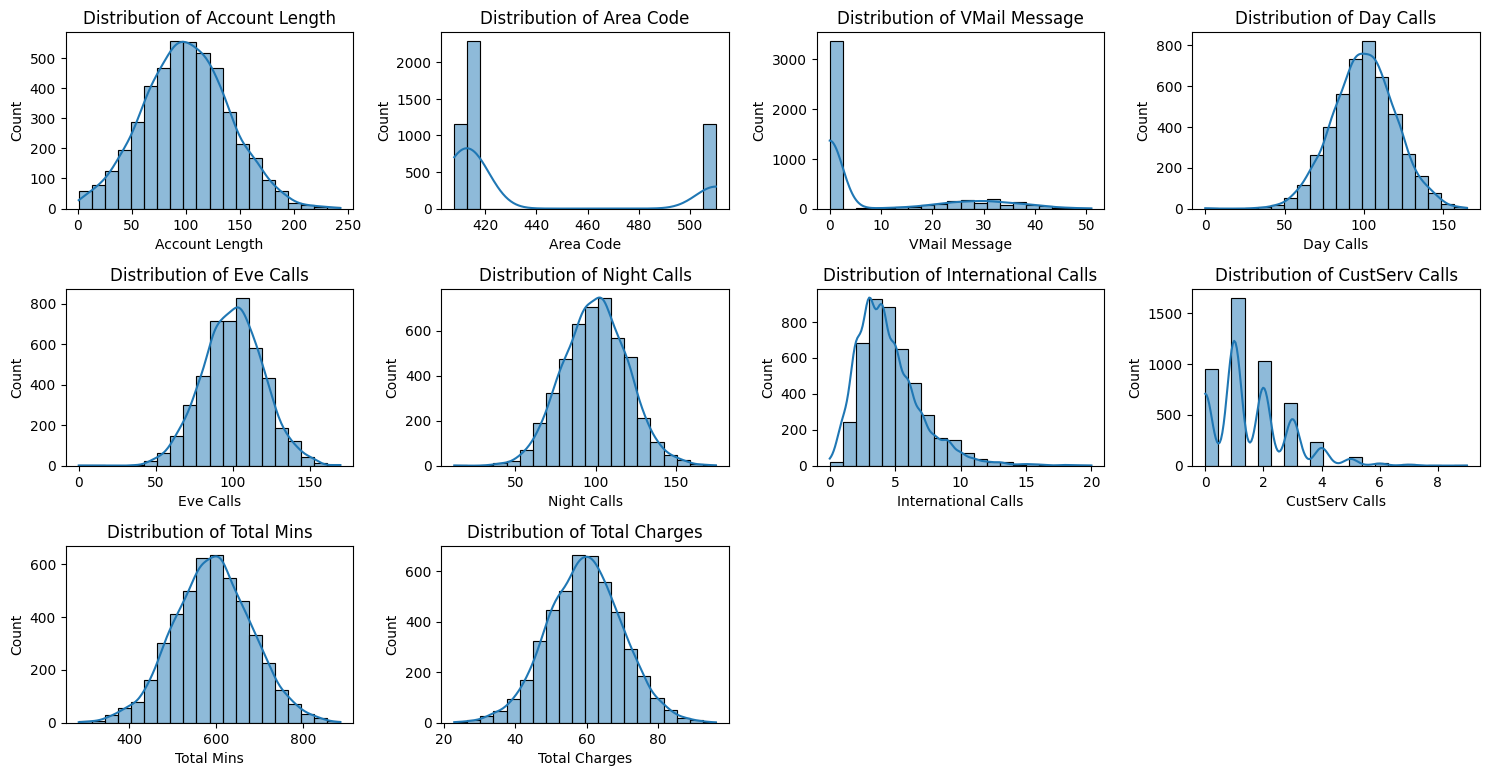

In [ ]:
numerical_columns = data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(15, 10))

# Creating  distplot for each numerical feature
for i, column in enumerate(numerical_columns.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(numerical_columns[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


#### Insights
Account Length, Day Calls, Eve Calls, Night Calls, Total Minutes, and Total Charges all show roughly normal distributions, indicating steady user behavior across most services.

International Calls and Customer Service Calls are right-skewed, meaning most customers make few international or service-related calls, but a few make significantly more.

Voice Mail Messages are highly skewed, suggesting regional concentration and limited voicemail usage among customers.



In [ ]:
data.describe(include='object').T

,count,unique,top,freq
International Plan,4617,2,no,4171
VMail Plan,4617,2,no,3381
Churn,4617,2,False.,3961
Region,4617,4,South,1562


## **Encoding**

**Label Encoding**  is used when the categorical variables have an ordinal relationship. It converts each category into a unique integer.

In [ ]:
label_encoder = LabelEncoder()

data['International Plan'] = label_encoder.fit_transform(data['International Plan'])
data['VMail Plan'] = label_encoder.fit_transform(data['VMail Plan'])
data['Churn'] = label_encoder.fit_transform(data['Churn'])
data['Region'] = label_encoder.fit_transform(data['Region'])




In [ ]:
data.head()

,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Calls,Eve Calls,Night Calls,International Calls,CustServ Calls,Churn,Region,Total Mins,Total Charges
0,128,415,0,1,25,110,99,91,3,1,0,0,717.2,75.56
1,107,415,0,1,26,123,103,103,3,1,0,0,625.2,59.24
2,137,415,0,0,0,114,110,104,5,0,0,1,539.4,62.29
3,84,408,1,0,0,71,88,89,7,2,0,0,564.8,66.80
4,75,415,1,0,0,113,122,121,3,3,0,2,512.0,52.09


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Account Length       4617 non-null   int64  
 1   Area Code            4617 non-null   int64  
 2   International Plan   4617 non-null   int64  
 3   VMail Plan           4617 non-null   int64  
 4   VMail Message        4617 non-null   int64  
 5   Day Calls            4617 non-null   int64  
 6   Eve Calls            4617 non-null   int64  
 7   Night Calls          4617 non-null   int64  
 8   International Calls  4617 non-null   int64  
 9   CustServ Calls       4617 non-null   int64  
 10  Churn                4617 non-null   int64  
 11  Region               4617 non-null   int64  
 12  Total Mins           4617 non-null   float64
 13  Total Charges        4617 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 505.1 KB


## **Checking the correlation**

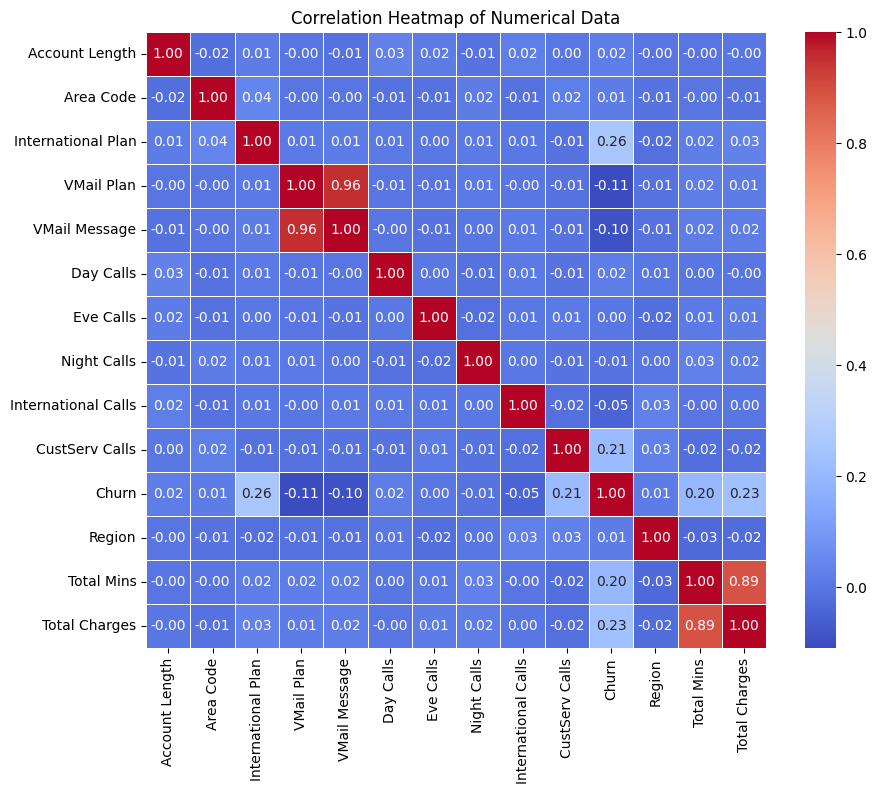

In [ ]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])



# correlation matrix
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Data')
plt.show()


In [ ]:
!pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 692.3/692.3 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.3 MB/s eta 0:00:00


## **Model Building**



In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score, classification_report,f1_score,confusion_matrix,ConfusionMatrixDisplay

from lazypredict.Supervised import LazyClassifier

## **Split the data into Test and Train**

In [ ]:
x = data.drop('Churn', axis=1)
y = data['Churn']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)



## **Lazy Prediction Algorithm**
**Lazypredict** is a Python library that helps quickly train and compare multiple machine learning models with minimal code. It automates model selection by training various regression or classification models and providing a performance summary.

***Features:***

***Automates Model Training:*** Trains multiple models with default hyperparameters.

***Quick Comparison:*** Generates a ranked table of model performance.

***Saves Time:*** Eliminates the need to manually define and train each model.

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)

models


  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 499, number of negative: 2963
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1123
[LightGBM] [Info] Number of data points in the train set: 3462, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.144136 -> initscore=-1.781351
[LightGBM] [Info] Start training from score -1.781351


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.96,0.88,0.88,0.96,1.13
RandomForestClassifier,0.97,0.88,0.88,0.97,2.34
BaggingClassifier,0.96,0.88,0.88,0.96,0.31
LGBMClassifier,0.97,0.88,0.88,0.96,0.39
DecisionTreeClassifier,0.93,0.87,0.87,0.93,0.05
ExtraTreesClassifier,0.94,0.81,0.81,0.93,0.47
SVC,0.92,0.75,0.75,0.91,0.86
ExtraTreeClassifier,0.86,0.75,0.75,0.86,0.02
GaussianNB,0.86,0.73,0.73,0.86,0.03


## **XGB → Extreme Gradient Boosting Classifier**

XGBoost Accuracy: 0.9645
XGBoost F1 Score: 0.9625

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       998
           1       0.98      0.75      0.85       157

    accuracy                           0.96      1155
   macro avg       0.97      0.87      0.92      1155
weighted avg       0.97      0.96      0.96      1155



<Figure size 800x600 with 0 Axes>

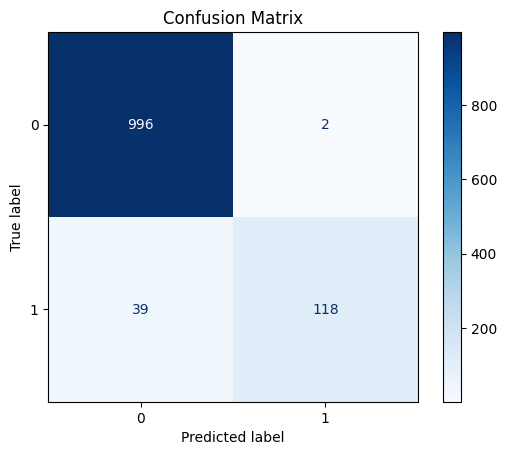

In [ ]:
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(x_train, y_train)

y_pred_xgb = xgb_model.predict(x_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average="weighted")

print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost F1 Score: {f1_xgb:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=xgb_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()


## **RandomForestClassifier**

Random Forest Accuracy: 0.9671
Random Forest F1 Score: 0.9651

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       998
           1       1.00      0.76      0.86       157

    accuracy                           0.97      1155
   macro avg       0.98      0.88      0.92      1155
weighted avg       0.97      0.97      0.97      1155



<Figure size 800x600 with 0 Axes>

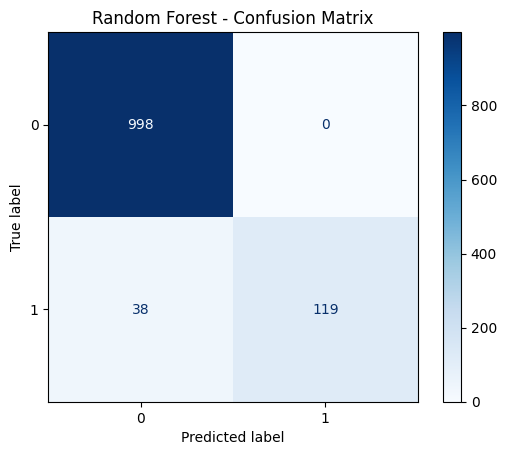

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average="weighted")

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest F1 Score: {f1_rf:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_rf), display_labels=rf_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Random Forest - Confusion Matrix")
plt.show()


## **LGBM → Light Gradient Boosting Machine Classifier**

[LightGBM] [Info] Number of positive: 499, number of negative: 2963
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1123
[LightGBM] [Info] Number of data points in the train set: 3462, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.144136 -> initscore=-1.781351
[LightGBM] [Info] Start training from score -1.781351
LGBM Accuracy: 0.9654
LGBM F1 Score: 0.9634

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       998
           1       0.98      0.76      0.86       157

    accuracy                           0.97      1155
   macro avg       0.97      0.88      0.92      1155
weighted avg       0.97      0.97      0.96      1155



<Figure size 800x600 with 0 Axes>

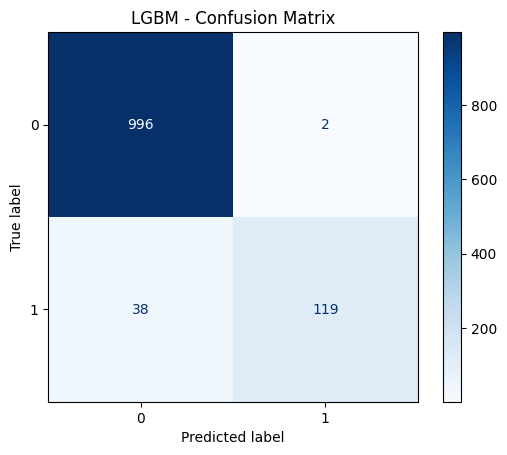

In [ ]:
lgbm_model = LGBMClassifier(n_estimators=100, learning_rate=0.05, max_depth=10, random_state=42)
lgbm_model.fit(x_train, y_train)

y_pred_lgbm = lgbm_model.predict(x_test)

accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
f1_lgbm = f1_score(y_test, y_pred_lgbm, average="weighted")

print(f"LGBM Accuracy: {accuracy_lgbm:.4f}")
print(f"LGBM F1 Score: {f1_lgbm:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgbm))

# Confusion Matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_lgbm), display_labels=lgbm_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("LGBM - Confusion Matrix")
plt.show()


## **DecisionTreeClassifier**

Decision Tree Accuracy: 0.9610
Decision Tree F1 Score: 0.9592

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       998
           1       0.94      0.76      0.84       157

    accuracy                           0.96      1155
   macro avg       0.95      0.88      0.91      1155
weighted avg       0.96      0.96      0.96      1155



<Figure size 800x600 with 0 Axes>

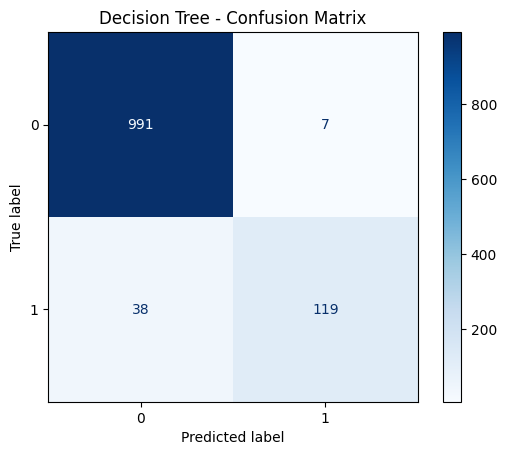

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(x_train, y_train)

y_pred_dt = dt_model.predict(x_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average="weighted")

print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Decision Tree F1 Score: {f1_dt:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_dt), display_labels=dt_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Decision Tree - Confusion Matrix")
plt.show()




## **BaggingClassifier**

Bagging Tree Accuracy: 0.9636
Bagging Tree F1 Score: 0.9617

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       998
           1       0.97      0.76      0.85       157

    accuracy                           0.96      1155
   macro avg       0.97      0.88      0.91      1155
weighted avg       0.96      0.96      0.96      1155



<Figure size 800x600 with 0 Axes>

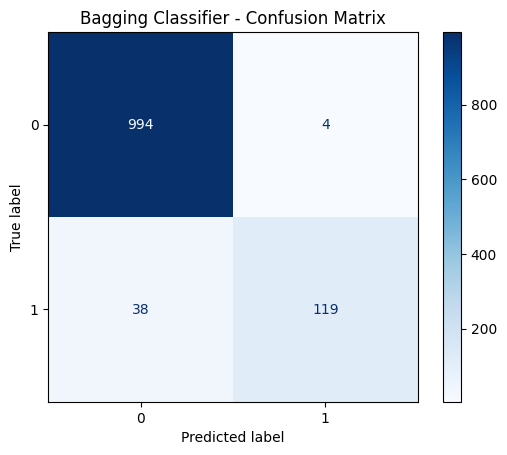

In [ ]:
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=5),
    n_estimators=50,
    random_state=42
)


bagging_model.fit(x_train, y_train)

y_pred_bagging = bagging_model.predict(x_test)

accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
f1_bagging = f1_score(y_test, y_pred_bagging, average="weighted")

print(f"Bagging Tree Accuracy: {accuracy_bagging:.4f}")
print(f"Bagging Tree F1 Score: {f1_bagging:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_bagging))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_bagging),
                              display_labels=bagging_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Bagging Classifier - Confusion Matrix")
plt.show()


## **Graph of the model Accuracy and F1 score**  

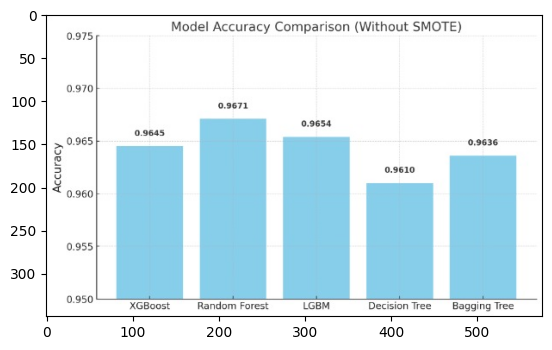

In [ ]:
import cv2
img = cv2.imread('/content/without smote accuracy.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

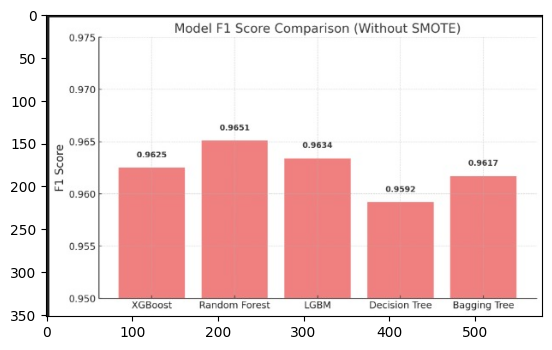

In [ ]:
img = cv2.imread('/content/without smote f1.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## **Best Model**
**Best Model: Random Forest**

*Accuracy: 0.9671 | F1 Score: 0.9651*

Highest accuracy and balanced performance across classes.




## **Over-sampling Technique**

**SMOTE** (Synthetic Minority Over-sampling Technique) is a method to handle class imbalance by generating synthetic samples for the minority class.




In [ ]:
from sklearn.impute import SimpleImputer
from collections import Counter


# Before applying SMOTE:
imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)

# Now apply SMOTE as before:
print("Before SMOTE:", Counter(y_train))

smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

print("After SMOTE:", Counter(y_train_smote))

Before SMOTE: Counter({0: 2963, 1: 499})
After SMOTE: Counter({0: 2963, 1: 2963})




## **XGB → Extreme Gradient Boosting Classifier**

XGBoost (with SMOTE) Accuracy: 0.9576
XGBoost (with SMOTE) F1 Score: 0.9559

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       998
           1       0.92      0.76      0.83       157

    accuracy                           0.96      1155
   macro avg       0.94      0.87      0.90      1155
weighted avg       0.96      0.96      0.96      1155



<Figure size 800x600 with 0 Axes>

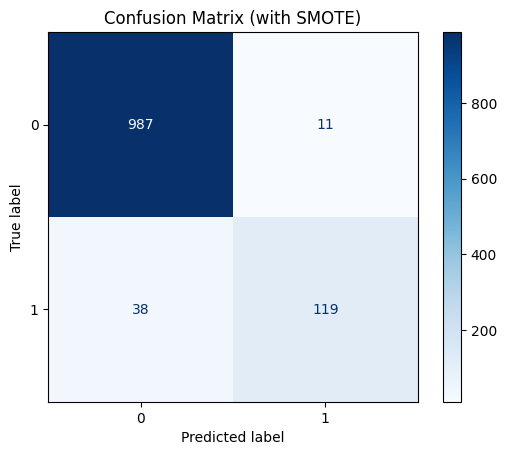

In [ ]:
xgb_model_smote = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model_smote.fit(x_train_smote, y_train_smote)

x_test = imputer.transform(x_test)

y_pred_xgb_smote = xgb_model_smote.predict(x_test)

accuracy_xgb_smote = accuracy_score(y_test, y_pred_xgb_smote)
f1_xgb_smote = f1_score(y_test, y_pred_xgb_smote, average="weighted")


print(f"XGBoost (with SMOTE) Accuracy: {accuracy_xgb_smote:.4f}")
print(f"XGBoost (with SMOTE) F1 Score: {f1_xgb_smote:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb_smote))


conf_matrix_smote = confusion_matrix(y_test, y_pred_xgb_smote)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_smote, display_labels=xgb_model_smote.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (with SMOTE)")
plt.show()


## **RandomForestClassifier**

Random Forest Accuracy (with SMOTE): 0.9558
Random Forest F1 Score (with SMOTE): 0.9550

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       998
           1       0.87      0.80      0.83       157

    accuracy                           0.96      1155
   macro avg       0.92      0.89      0.90      1155
weighted avg       0.95      0.96      0.96      1155



<Figure size 800x600 with 0 Axes>

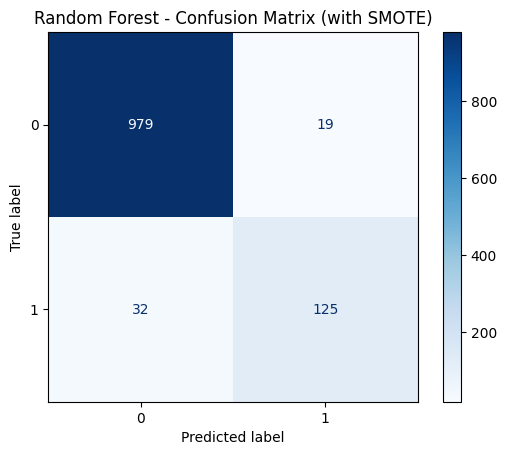

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(x_train_smote, y_train_smote)

y_pred_rf = rf_model.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average="weighted")

print(f"Random Forest Accuracy (with SMOTE): {accuracy_rf:.4f}")
print(f"Random Forest F1 Score (with SMOTE): {f1_rf:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_rf), display_labels=rf_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Random Forest - Confusion Matrix (with SMOTE)")
plt.show()


## **LGBM → Light Gradient Boosting Machine Classifier**



[LightGBM] [Info] Number of positive: 2963, number of negative: 2963
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2807
[LightGBM] [Info] Number of data points in the train set: 5926, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LGBM Accuracy (with SMOTE): 0.9567
LGBM F1 Score (with SMOTE): 0.9556

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       998
           1       0.88      0.78      0.83       157

    accuracy                           0.96      1155
   macro avg       0.93      0.88      0.90      1155
weighted avg       0.96      0.96      0.96      1155



<Figure size 800x600 with 0 Axes>

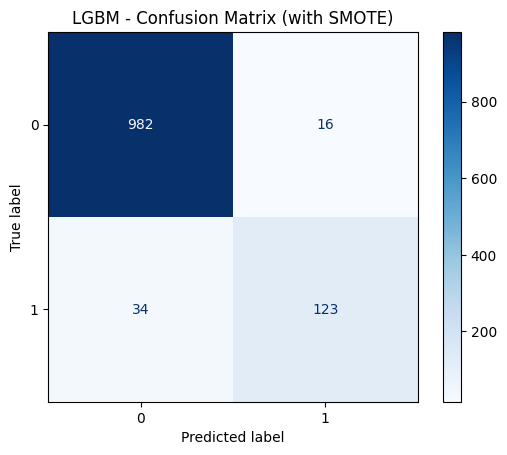

In [ ]:
lgbm_model = LGBMClassifier(n_estimators=100, learning_rate=0.05, max_depth=10, random_state=42)
lgbm_model.fit(x_train_smote, y_train_smote)

y_pred_lgbm = lgbm_model.predict(x_test)


accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
f1_lgbm = f1_score(y_test, y_pred_lgbm, average="weighted")

print(f"LGBM Accuracy (with SMOTE): {accuracy_lgbm:.4f}")
print(f"LGBM F1 Score (with SMOTE): {f1_lgbm:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgbm))

# Confusion Matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_lgbm), display_labels=lgbm_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("LGBM - Confusion Matrix (with SMOTE)")
plt.show()


## **DecisionTreeClassifier**

Decision Tree Accuracy (with SMOTE): 0.9247
Decision Tree F1 Score (with SMOTE): 0.9285

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96       998
           1       0.67      0.87      0.76       157

    accuracy                           0.92      1155
   macro avg       0.83      0.90      0.86      1155
weighted avg       0.94      0.92      0.93      1155



<Figure size 800x600 with 0 Axes>

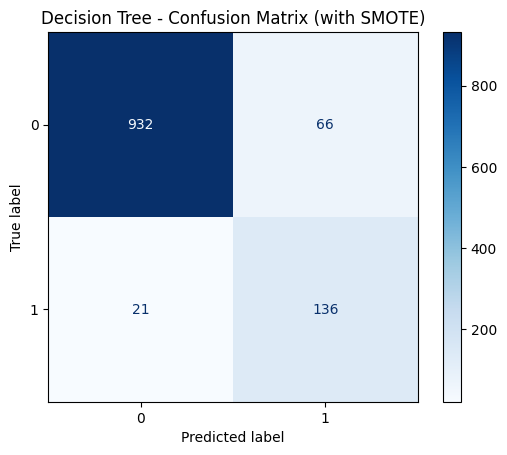

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(x_train_smote, y_train_smote)


y_pred_dt = dt_model.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average="weighted")


print(f"Decision Tree Accuracy (with SMOTE): {accuracy_dt:.4f}")
print(f"Decision Tree F1 Score (with SMOTE): {f1_dt:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_dt), display_labels=dt_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Decision Tree - Confusion Matrix (with SMOTE)")
plt.show()



## **BaggingClassifier**

Bagging Tree Accuracy (with SMOTE): 0.9247
Bagging Tree F1 Score (with SMOTE): 0.9285

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96       998
           1       0.67      0.87      0.76       157

    accuracy                           0.92      1155
   macro avg       0.83      0.90      0.86      1155
weighted avg       0.94      0.92      0.93      1155



<Figure size 800x600 with 0 Axes>

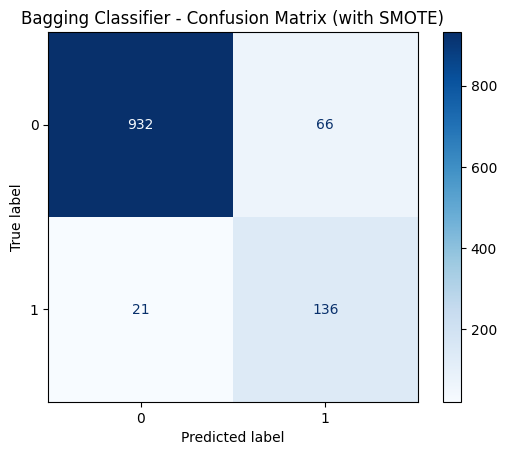

In [ ]:
bagging_model_smote = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=5),
    n_estimators=50,
    random_state=42
)

bagging_model_smote.fit(x_train_smote, y_train_smote)

y_pred_bagging_smote = bagging_model_smote.predict(x_test)
accuracy_bagging_smote = accuracy_score(y_test, y_pred_bagging_smote)
f1_bagging_smote = f1_score(y_test, y_pred_bagging_smote, average="weighted")


print(f"Bagging Tree Accuracy (with SMOTE): {accuracy_bagging_smote:.4f}")
print(f"Bagging Tree F1 Score (with SMOTE): {f1_bagging_smote:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_bagging_smote))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_bagging_smote),
                              display_labels=bagging_model_smote.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Bagging Classifier - Confusion Matrix (with SMOTE)")
plt.show()


## **Graph of the model Accuracy and F1 score With Smote**

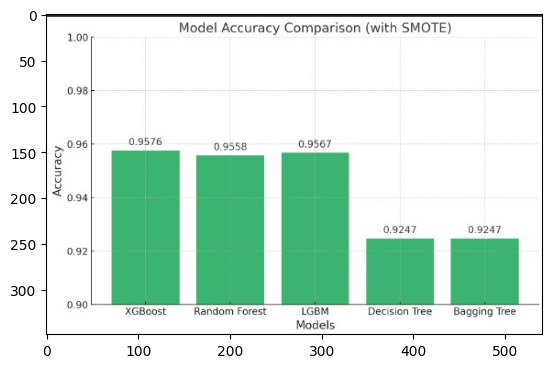

In [ ]:
img = cv2.imread('/content/smote accuracy.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

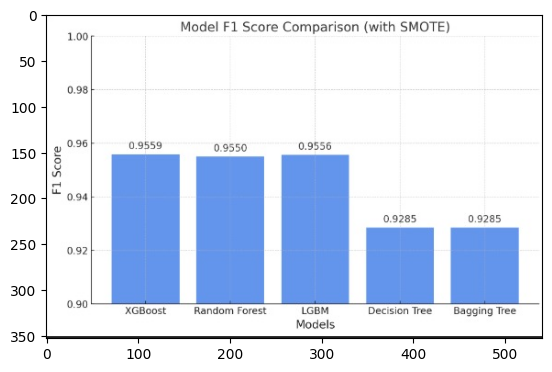

In [ ]:
img = cv2.imread('/content/smotef1.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## **Best Model With SMOTE (Oversampling Applied)**

**Best Model: XGBoost**

*Accuracy: 0.9576 | F1 Score: 0.9559*

Handles class imbalance better than others.

**Final Verdict: XGBoost is the best choice**

Best at handling oversampled data while maintaining balanced performance.

## **Under-sampling Technique**
Undersampling is the process of reducing the number of samples in the majority class to balance an imbalanced dataset.

In [ ]:

from imblearn.under_sampling import RandomUnderSampler
print("Before Undersampling:", Counter(y_train))

undersample = RandomUnderSampler(random_state=42)
x_train_undersampled, y_train_undersampled = undersample.fit_resample(x_train, y_train)

print("After Undersampling:", Counter(y_train_undersampled))


xgb_model_undersampled = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model_undersampled.fit(x_train_undersampled, y_train_undersampled)



Before Undersampling: Counter({0: 2963, 1: 499})
After Undersampling: Counter({0: 499, 1: 499})


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

## **XGB → Extreme Gradient Boosting Classifier**

XGBoost (Undersampled) Accuracy: 0.9255
XGBoost (Undersampled) F1 Score: 0.9288

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       998
           1       0.68      0.85      0.76       157

    accuracy                           0.93      1155
   macro avg       0.83      0.89      0.86      1155
weighted avg       0.94      0.93      0.93      1155



<Figure size 800x600 with 0 Axes>

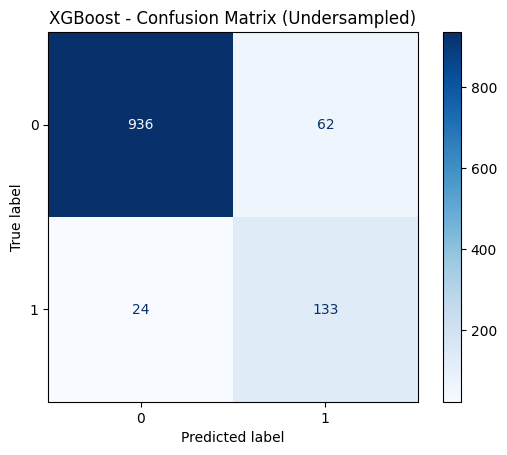

In [ ]:

xgb_model_undersampled = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model_undersampled.fit(x_train_undersampled, y_train_undersampled)

y_pred_undersampled = xgb_model_undersampled.predict(x_test)


accuracy_undersampled = accuracy_score(y_test, y_pred_undersampled)
f1_undersampled = f1_score(y_test, y_pred_undersampled, average="weighted")


print(f"XGBoost (Undersampled) Accuracy: {accuracy_undersampled:.4f}")
print(f"XGBoost (Undersampled) F1 Score: {f1_undersampled:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_undersampled))

# Confusion Matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_undersampled), display_labels=xgb_model_undersampled.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("XGBoost - Confusion Matrix (Undersampled)")
plt.show()


## **RandomForestClassifier**

Random Forest (Undersampled) Accuracy: 0.9177
Random Forest (Undersampled) F1 Score: 0.9224

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95       998
           1       0.65      0.86      0.74       157

    accuracy                           0.92      1155
   macro avg       0.81      0.89      0.85      1155
weighted avg       0.93      0.92      0.92      1155



<Figure size 800x600 with 0 Axes>

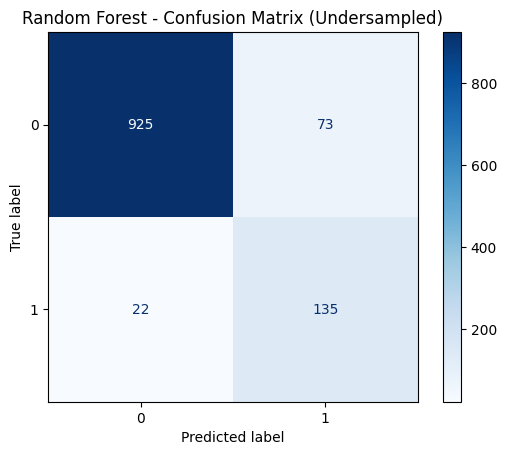

In [ ]:
rf_model_undersampled = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model_undersampled.fit(x_train_undersampled, y_train_undersampled)

y_pred_rf_undersampled = rf_model_undersampled.predict(x_test)
accuracy_rf_undersampled = accuracy_score(y_test, y_pred_rf_undersampled)
f1_rf_undersampled = f1_score(y_test, y_pred_rf_undersampled, average="weighted")


print(f"Random Forest (Undersampled) Accuracy: {accuracy_rf_undersampled:.4f}")
print(f"Random Forest (Undersampled) F1 Score: {f1_rf_undersampled:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_undersampled))

# Confusion Matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_rf_undersampled),
                              display_labels=rf_model_undersampled.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Random Forest - Confusion Matrix (Undersampled)")
plt.show()


## **LGBM → Light Gradient Boosting Machine Classifier**

[LightGBM] [Info] Number of positive: 499, number of negative: 499
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1009
[LightGBM] [Info] Number of data points in the train set: 998, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

<Figure size 800x600 with 0 Axes>

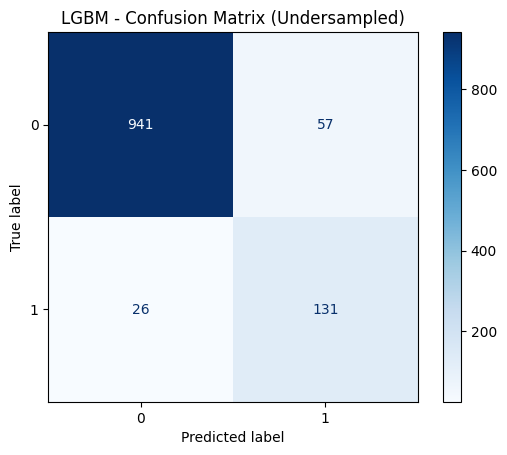

In [ ]:
lgbm_model_undersampled = LGBMClassifier(n_estimators=100, learning_rate=0.05, max_depth=10, random_state=42)
lgbm_model_undersampled.fit(x_train_undersampled, y_train_undersampled)
y_pred_lgbm_undersampled = lgbm_model_undersampled.predict(x_test)


accuracy_lgbm_undersampled = accuracy_score(y_test, y_pred_lgbm_undersampled)
f1_lgbm_undersampled = f1_score(y_test, y_pred_lgbm_undersampled, average="weighted")


print(f"LGBM (Undersampled) Accuracy: {accuracy_lgbm_undersampled:.4f}")
print(f"LGBM (Undersampled) F1 Score: {f1_lgbm_undersampled:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgbm_undersampled))

# Confusion Matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_lgbm_undersampled),
                              display_labels=lgbm_model_undersampled.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("LGBM - Confusion Matrix (Undersampled)")
plt.show()


## **DecisionTreeClassifier**

Decision Tree (Undersampled) Accuracy: 0.9203
Decision Tree (Undersampled) F1 Score: 0.9248

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95       998
           1       0.66      0.87      0.75       157

    accuracy                           0.92      1155
   macro avg       0.82      0.90      0.85      1155
weighted avg       0.93      0.92      0.92      1155



<Figure size 800x600 with 0 Axes>

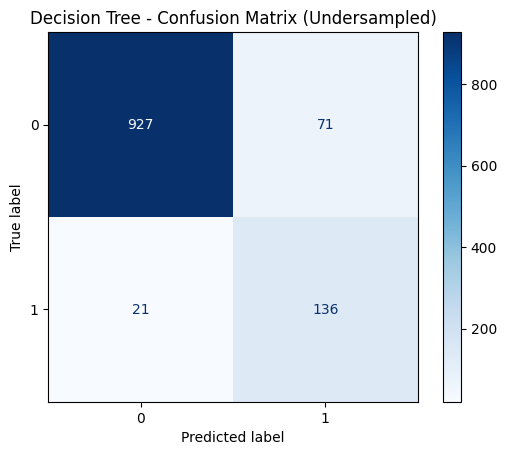

In [ ]:
dt_model_undersampled = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model_undersampled.fit(x_train_undersampled, y_train_undersampled)

# Make predictions
y_pred_dt_undersampled = dt_model_undersampled.predict(x_test)

# Evaluate the model
accuracy_dt_undersampled = accuracy_score(y_test, y_pred_dt_undersampled)
f1_dt_undersampled = f1_score(y_test, y_pred_dt_undersampled, average="weighted")


print(f"Decision Tree (Undersampled) Accuracy: {accuracy_dt_undersampled:.4f}")
print(f"Decision Tree (Undersampled) F1 Score: {f1_dt_undersampled:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt_undersampled))

# Confusion Matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_dt_undersampled),
                              display_labels=dt_model_undersampled.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Decision Tree - Confusion Matrix (Undersampled)")
plt.show()


## **BaggingClassifier**

Bagging Tree Accuracy (Undersampled): 0.9281
Bagging Tree F1 Score (Undersampled): 0.9315

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       998
           1       0.69      0.87      0.77       157

    accuracy                           0.93      1155
   macro avg       0.83      0.90      0.86      1155
weighted avg       0.94      0.93      0.93      1155



<Figure size 800x600 with 0 Axes>

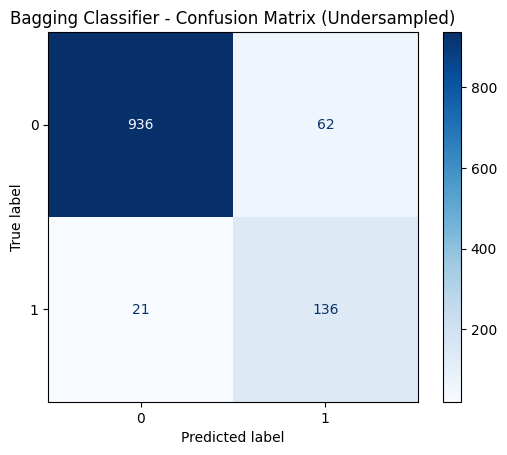

In [ ]:
bagging_model_undersampled = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=5),
    n_estimators=50,
    random_state=42
)

bagging_model_undersampled.fit(x_train_undersampled, y_train_undersampled)

# Make predictions
y_pred_bagging_undersampled = bagging_model_undersampled.predict(x_test)

accuracy_bagging_undersampled = accuracy_score(y_test, y_pred_bagging_undersampled)
f1_bagging_undersampled = f1_score(y_test, y_pred_bagging_undersampled, average="weighted")

print(f"Bagging Tree Accuracy (Undersampled): {accuracy_bagging_undersampled:.4f}")
print(f"Bagging Tree F1 Score (Undersampled): {f1_bagging_undersampled:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_bagging_undersampled))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_bagging_undersampled),
                              display_labels=bagging_model_undersampled.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Bagging Classifier - Confusion Matrix (Undersampled)")
plt.show()


## **Graph of the model Accuracy and F1 score With Under-sampling**

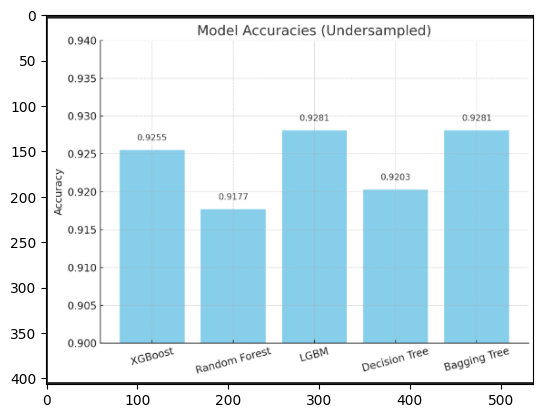

In [ ]:
img = cv2.imread('/content/accuracy.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

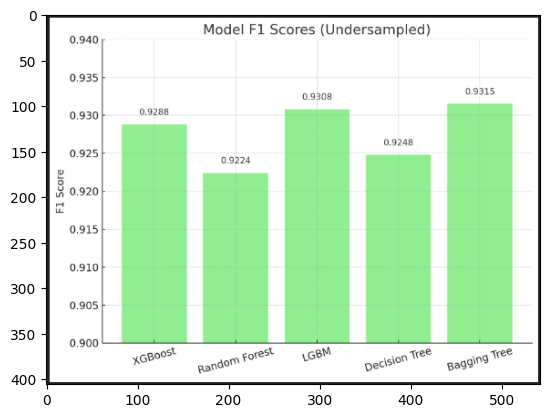

In [ ]:
img = cv2.imread('/content/f1 score.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## **Best Model (Under-sampling Applied)**

**Best Model: Bagging Tree**

*Accuracy: 0.9281 | F1 Score: 0.9315*

Handles class imbalance better than others.

**Final Verdict: Bagging Tree is the best choice**

Best at handling Under-sampled data while maintaining balanced performance.

Top 10 Customers Most Likely to Churn:


,ChurnRiskScore
870,1.00
118,1.00
981,1.00
167,1.00
148,1.00
166,1.00
1139,1.00
533,1.00
1073,1.00
990,1.00


✅ Churn risk scores saved to churn_risk_scores_xgboost.csv


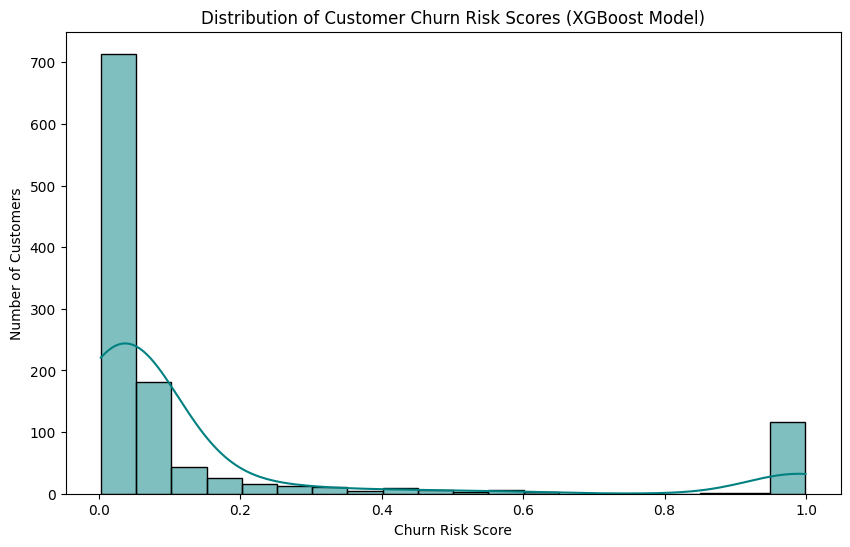

In [ ]:

# 1. Predict churn probability using xgb_model
y_pred_probs = xgb_model_smote.predict_proba(x_test)[:, 1]

churn_risk_df = pd.DataFrame({
    'ChurnRiskScore': y_pred_probs
})

# 3. Just show Top 10 Risky Customers (without CustomerID)
churn_risk_df = churn_risk_df.sort_values(by='ChurnRiskScore', ascending=False)

print("Top 10 Customers Most Likely to Churn:")
display(churn_risk_df.head(10))

# 5. Save the churn risk scores
churn_risk_df.to_csv("churn_risk_scores_xgboost.csv", index=False)
print("✅ Churn risk scores saved to churn_risk_scores_xgboost.csv")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(churn_risk_df['ChurnRiskScore'], bins=20, kde=True, color='teal')
plt.title("Distribution of Customer Churn Risk Scores (XGBoost Model)")
plt.xlabel("Churn Risk Score")
plt.ylabel("Number of Customers")
plt.show()


## **Defining campaign triggers:**

Risk > 0.8 → *Priority Retention*

Risk = 0.5–0.8 → *Moderate Action*

Risk < 0.5 → *Monitor only*

Send special offers or personalized messages to the high-risk customers

In [ ]:
def define_campaign_trigger(risk_score):
    if risk_score > 0.8:
        return 'Priority Retention'
    elif risk_score > 0.5:
        return 'Moderate Action'
    else:
        return 'Monitor Only'

# Apply the function to the churn risk scores
churn_risk_df['CampaignTrigger'] = churn_risk_df['ChurnRiskScore'].apply(define_campaign_trigger)

print("Top 10 Customers Most Likely to Churn with Campaign Trigger:")
display(churn_risk_df.head(10))

# 9. Save the updated churn risk scores with Campaign Triggers
churn_risk_df.to_csv("churn_risk_scores_with_triggers.csv", index=False)
print("✅ Churn risk scores with campaign triggers saved to churn_risk_scores_with_triggers.csv")


Top 10 Customers Most Likely to Churn with Campaign Trigger:


,ChurnRiskScore,CampaignTrigger
870,1.00,Priority Retention
118,1.00,Priority Retention
981,1.00,Priority Retention
167,1.00,Priority Retention
148,1.00,Priority Retention
166,1.00,Priority Retention
1139,1.00,Priority Retention
533,1.00,Priority Retention
1073,1.00,Priority Retention
990,1.00,Priority Retention


✅ Churn risk scores with campaign triggers saved to churn_risk_scores_with_triggers.csv


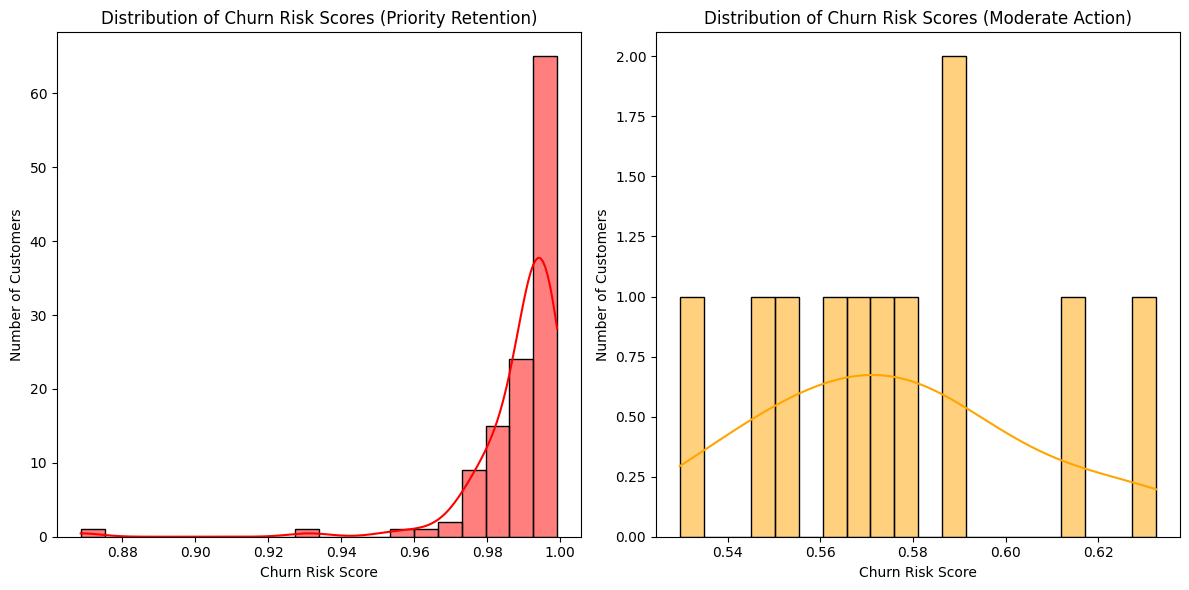

In [ ]:
priority_retention_df = churn_risk_df[churn_risk_df['CampaignTrigger'] == 'Priority Retention']
moderate_action_df = churn_risk_df[churn_risk_df['CampaignTrigger'] == 'Moderate Action']

plt.figure(figsize=(12,6))

# Subplot for Priority Retention customers
plt.subplot(1, 2, 1)
sns.histplot(priority_retention_df['ChurnRiskScore'], bins=20, kde=True, color='red')
plt.title("Distribution of Churn Risk Scores (Priority Retention)")
plt.xlabel("Churn Risk Score")
plt.ylabel("Number of Customers")

# Subplot for Moderate Action customers
plt.subplot(1, 2, 2)
sns.histplot(moderate_action_df['ChurnRiskScore'], bins=20, kde=True, color='orange')
plt.title("Distribution of Churn Risk Scores (Moderate Action)")
plt.xlabel("Churn Risk Score")
plt.ylabel("Number of Customers")

plt.tight_layout()
plt.show()


## **Insights**

1. High churn risk customers (Priority Retention) are heavily concentrated near a score of 1.0, indicating they urgently need strong retention efforts.

2. Moderate risk customers are sparsely distributed between 0.53 and 0.63, suggesting a lower but still notable risk of churn.

3. Resource allocation should prioritize the high-risk group first, while moderate-risk customers can be managed with less intensive strategies.

## **Challenges Faced**

 Imbalanced data — Very few customers are actually churning compared to non-churners.



 Outside competition — Some churn reasons are not visible in the data (like better offers from other companies).



##  Final Recommendation:

1. **Best Overall Model:**  Random Forest

 *Accuracy: 96.71% | F1 Score: 96.51%*

 **Reason:** Achieves the highest accuracy and balanced performance across churn and non-churn classes.

2. **Best Model with Under-Sampling:**  Bagging Tree

 *Accuracy: 92.81% | F1 Score: 93.15%*

 **Reason:** Good performance after handling class imbalance using undersampling.

3. **Best Model with Over-Sampling (SMOTE):** XGBoost

 *Accuracy: 95.76% | F1 Score: 95.59%*

 **Reason:** Handles class imbalance better and still achieves very high scores.